separate the c3 and c6 particles

- identified eigenvectors which exhibit high variance around the p4s by looking at spectral average 'series' in c3_or_c6_eigs.txt

In [ ]:
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dpcaa.base import DPCAA

In [3]:
eigs_txt = 'c3_or_c6_eigs.txt'

In [4]:
df = pd.read_csv(eigs_txt, header=None, names=['eig_raw'])
df.head()

,eig_raw
0,2 (corrupted)
1,5
2,6
3,7
4,10


In [5]:
df['eig'] = df['eig_raw'].apply(lambda x: int(x.split()[0]))
df.head()

,eig_raw,eig
0,2 (corrupted),2
1,5,5
2,6,6
3,7,7
4,10,10


In [6]:
df['corrupted'] = df['eig_raw'].apply(lambda x: 'corrupted' in x)
df.head()

,eig_raw,eig,corrupted
0,2 (corrupted),2,True
1,5,5,False
2,6,6,False
3,7,7,False
4,10,10,False


In [7]:
eigs = df['eig']
eigs_no_wedge_bias = df['eig'][df['corrupted'] == False]

In [8]:
eigs, eigs_no_wedge_bias

(0      2
 1      5
 2      6
 3      7
 4     10
 5     11
 6     13
 7     14
 8     16
 9     17
 10    18
 11    19
 12    20
 13    21
 14    22
 15    24
 16    37
 17    38
 Name: eig, dtype: int64,
 1      5
 2      6
 3      7
 4     10
 5     11
 6     13
 7     14
 8     16
 9     17
 10    18
 11    19
 12    20
 13    21
 14    22
 15    24
 16    37
 17    38
 Name: eig, dtype: int64)

In [9]:
data = Path()
eigenvolumes = data / 'eigenvolumes'
eigentable = data / 'eigentable.csv'

pca = DPCAA(eigenvolumes_dir=eigenvolumes, eigentable_file=eigentable)

In [10]:
eigentable_data_of_interest = pca.eigentable[:, eigs]
eigentable_data_of_interest_no_wedge_bias = pca.eigentable[:, eigs_no_wedge_bias]

In [11]:
eigentable_data_of_interest.shape

(7297, 18)

In [12]:
from umap import UMAP

In [13]:
reducer = UMAP()
embedding = reducer.fit_transform(eigentable_data_of_interest)

In [14]:
embedding.shape

(7297, 2)

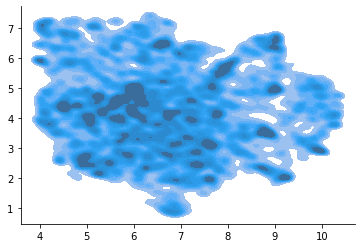

In [15]:
sns.kdeplot(x=embedding[:, 0], y=embedding[:, 1], bw_adjust=0.25, fill=True)
sns.despine()

In [16]:
reducer_no_wedge_bias = UMAP()
embedding = reducer.fit_transform(eigentable_data_of_interest_no_wedge_bias)

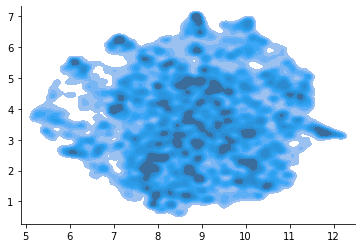

In [17]:
sns.kdeplot(x=embedding[:, 0], y=embedding[:, 1], bw_adjust=0.25, fill=True)
sns.despine()

In [21]:
from hdbscan import HDBSCAN

In [25]:
clusterer = HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(embedding)
labels = clusterer.labels_

In [26]:
labels.shape

(7297,)

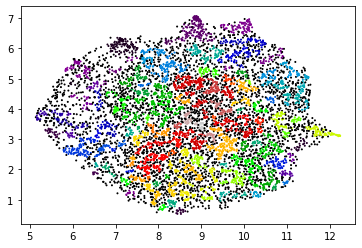

In [34]:
fig, ax = plt.subplots()
ax.scatter(x=embedding[:, 0], y=embedding[:, 1], c=labels, s=1, cmap='nipy_spectral')